In [2]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
# https://hydrofunctions.readthedocs.io/en/master/
# help(hf.NWIS)

In [11]:
site = hf.NWIS('06730200', 'iv', period='P7D') # '06730200' = site, 'iv' = instantaneous values / 'dv' = daily mean values, 'P55D' = Past 55 days, stateCd='va' => download all of virginia (careful), bBox = boundary box
# From Docs: "The Daily Mean discharge data are great for situations where you want to know the baseflow of a watershed, or the volume of water that is entering a reservoir or if you want to learn about the long-term hydrology of a watershed."
site.meta

Requested data from https://waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=06730200&period=P7D


{'USGS:06730200': {'siteName': 'BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO',
  'siteLatLongSrs': {'srs': 'EPSG:4326',
   'latitude': 40.05165184,
   'longitude': -105.1788754},
  'timeSeries': {'00060': {'variableFreq': '<15 * Minutes>',
    'variableUnit': 'ft3/s',
    'variableDescription': 'Discharge, cubic feet per second'},
   '00065': {'variableFreq': '<15 * Minutes>',
    'variableUnit': 'ft',
    'variableDescription': 'Gage height, feet'}}}}

In [12]:
key = 'USGS:' + site.site
print(site.meta[key]['siteName'])
site.df().head()

BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO


,USGS:06730200:00060:00000,USGS:06730200:00060:00000_qualifiers,USGS:06730200:00065:00000,USGS:06730200:00065:00000_qualifiers
datetimeUTC,,,,
2021-02-28 08:15:00+00:00,18.0,P,4.34,P
2021-02-28 08:30:00+00:00,18.0,P,4.34,P
2021-02-28 08:45:00+00:00,17.6,P,4.33,P
2021-02-28 09:00:00+00:00,17.3,P,4.32,P
2021-02-28 09:15:00+00:00,17.3,P,4.32,P


In [13]:
discharge = site.df('discharge')
stage = site.df('stage')
# Notice the variables included match the columns i.e. Discharge: USGS:06730200:00060:00000 and Gage Height: USGS:06730200:00065:00000

Text(0.5, 0, 'Time')

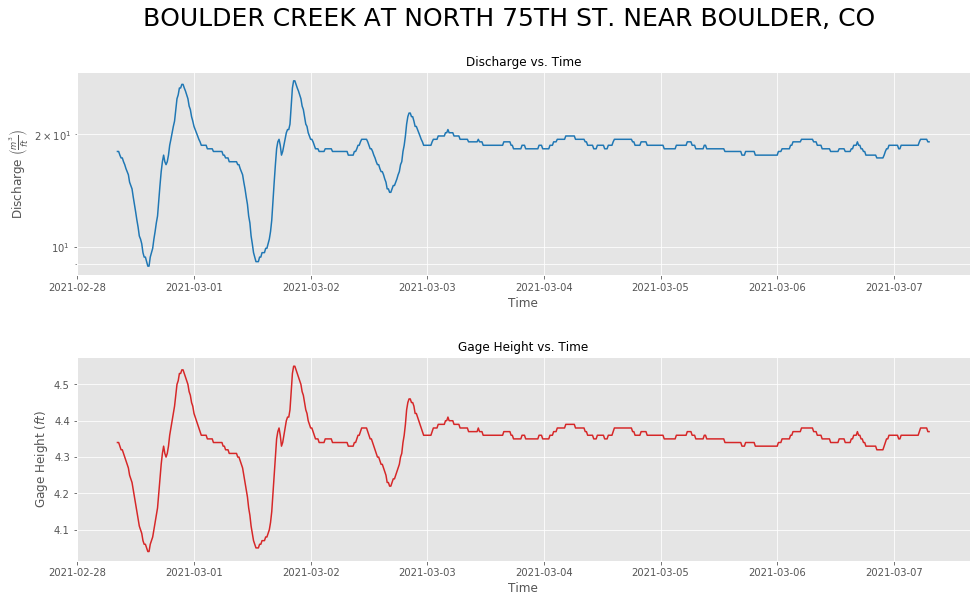

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle(site.meta[key]['siteName'], fontsize=25)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

ax1.semilogy(site.df('discharge'), c='tab:blue')
ax1.set_title('Discharge vs. Time', fontsize=12)
ax1.set_xlabel('Time')
ax1.set_ylabel(r'Discharge $\left(\frac{m^3}{ft}\right)$')
ax1.grid(True, which="minor")

ax2.plot(site.df('stage'), c='tab:red')
ax2.set_title('Gage Height vs. Time', fontsize=12)
ax2.set_ylabel(r'Gage Height $\left( ft \right)$')
ax2.set_xlabel('Time')


In [8]:
# TO DO:
# 1) Implement GFS model for corresponding boundary box with weather and soil variables ?